# [주식 포트폴리오 분석](https://www.kaggle.com/code/hassanoukhouya/portfolio-management-with-python)

In [1]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
# pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats


import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
# sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

## Load Data

In [2]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf

GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Google
AAPL = yf.download("AAPL", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Apple
META = yf.download("META", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Facebook
AMZN = yf.download("AMZN", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Amazon
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Microsoft
GSPC = yf.download("^GSPC", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of S&P 500

print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6) (2673, 6)


In [3]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,15.569143,15.751460,14.861794,14.953949,14.900411,239835606
2012-05-21,14.956689,15.334772,14.943986,15.295419,15.240658,123477094
2012-05-22,15.278732,15.287947,14.844360,14.963912,14.910338,122533571
2012-05-23,14.985082,15.183090,14.872255,15.179603,15.125257,127600492
2012-05-24,15.172131,15.240873,14.915842,15.035145,14.981316,75935562


## Exploratory Data Analysis (EDA)

### Data Analysis

In [4]:
GOOG.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
#Combining dataframes
dataset = pd.concat([GOOG.Close, AAPL.Close,META.Close,AMZN.Close, MSFT.Close,GSPC.Close],axis=1)
# Change the column names
dataset.columns =['GOOG', 'AAPL', 'META','AMZN','MSFT','GSPC']
dataset.head()

,GOOG,AAPL,META,AMZN,MSFT,GSPC
Date,,,,,,
2012-05-18,14.953949,18.942142,38.230000,10.6925,29.270000,1295.219971
2012-05-21,15.295419,20.045713,34.029999,10.9055,29.750000,1315.989990
2012-05-22,14.963912,19.891787,31.000000,10.7665,29.760000,1316.630005
2012-05-23,15.179603,20.377144,32.000000,10.8640,29.110001,1318.859985
2012-05-24,15.035145,20.190001,33.029999,10.7620,29.070000,1320.680054


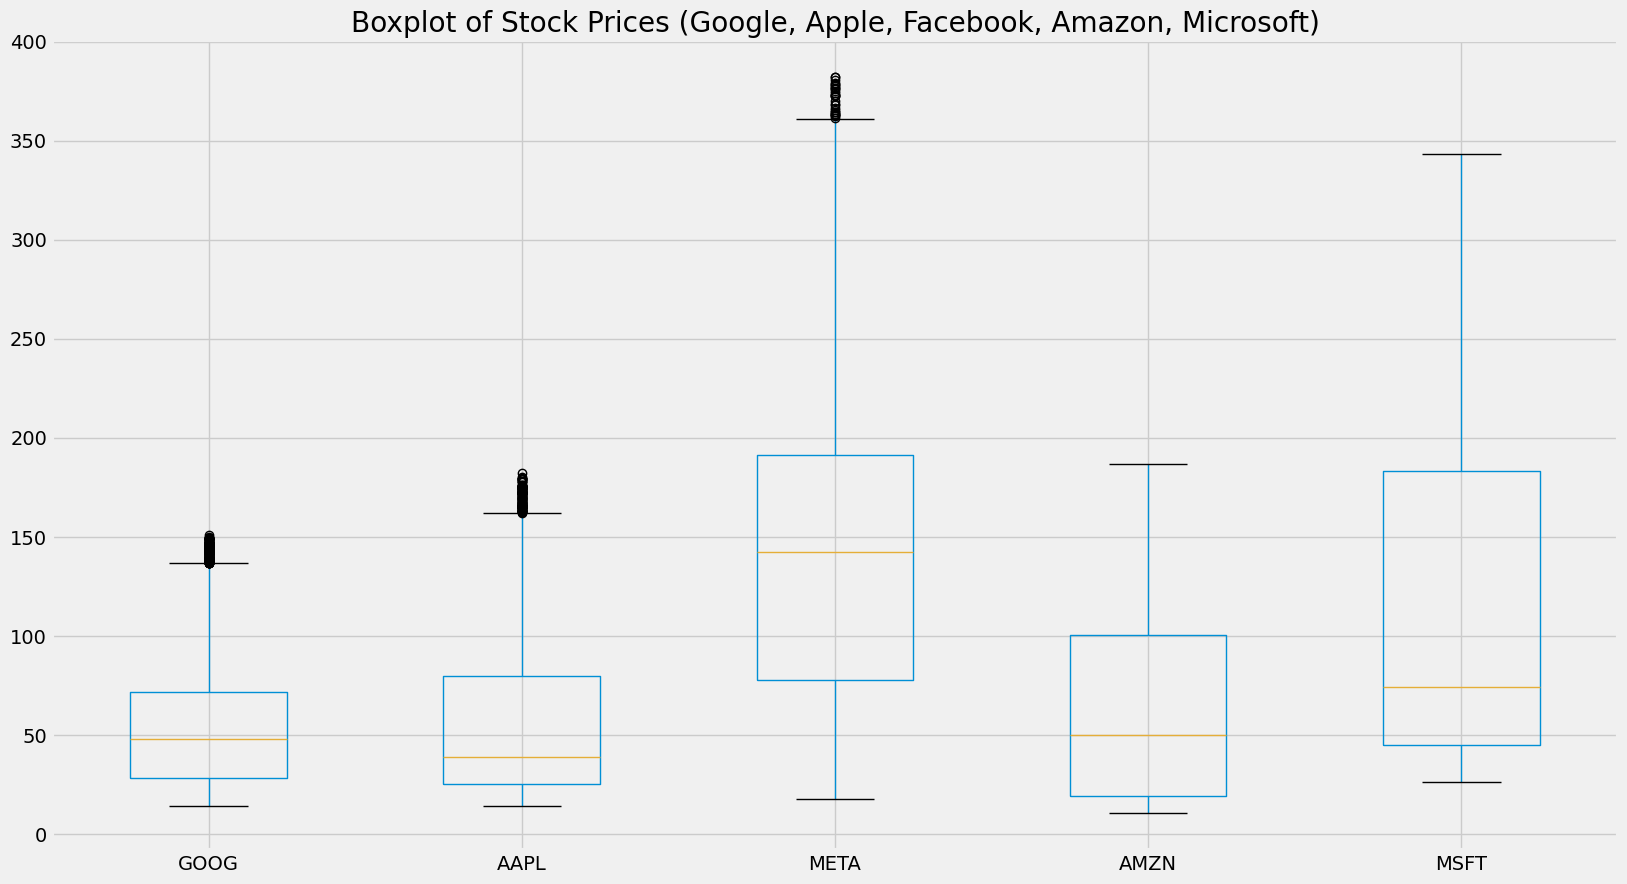

In [6]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot()
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

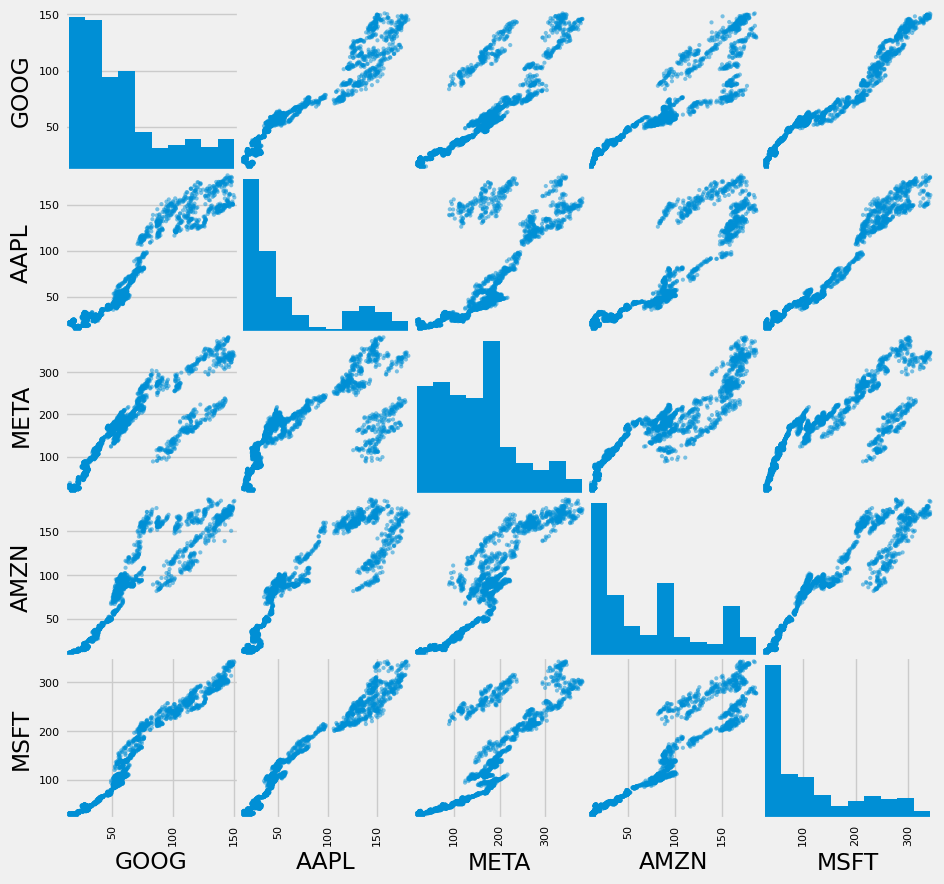

In [7]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

### Visualization of the closing prices evolution of each company
> 각 기업의 종가 추이를 시각화 

- 여러 기업의 주식 종가(closing prices) 데이터를 시간순으로 보여줌
- 시간에 따른 가격 변화(evolution)를 그래프로 표현
- 각 기업별(each company) 가격 변동을 비교할 수 있게 시각화(visualization)

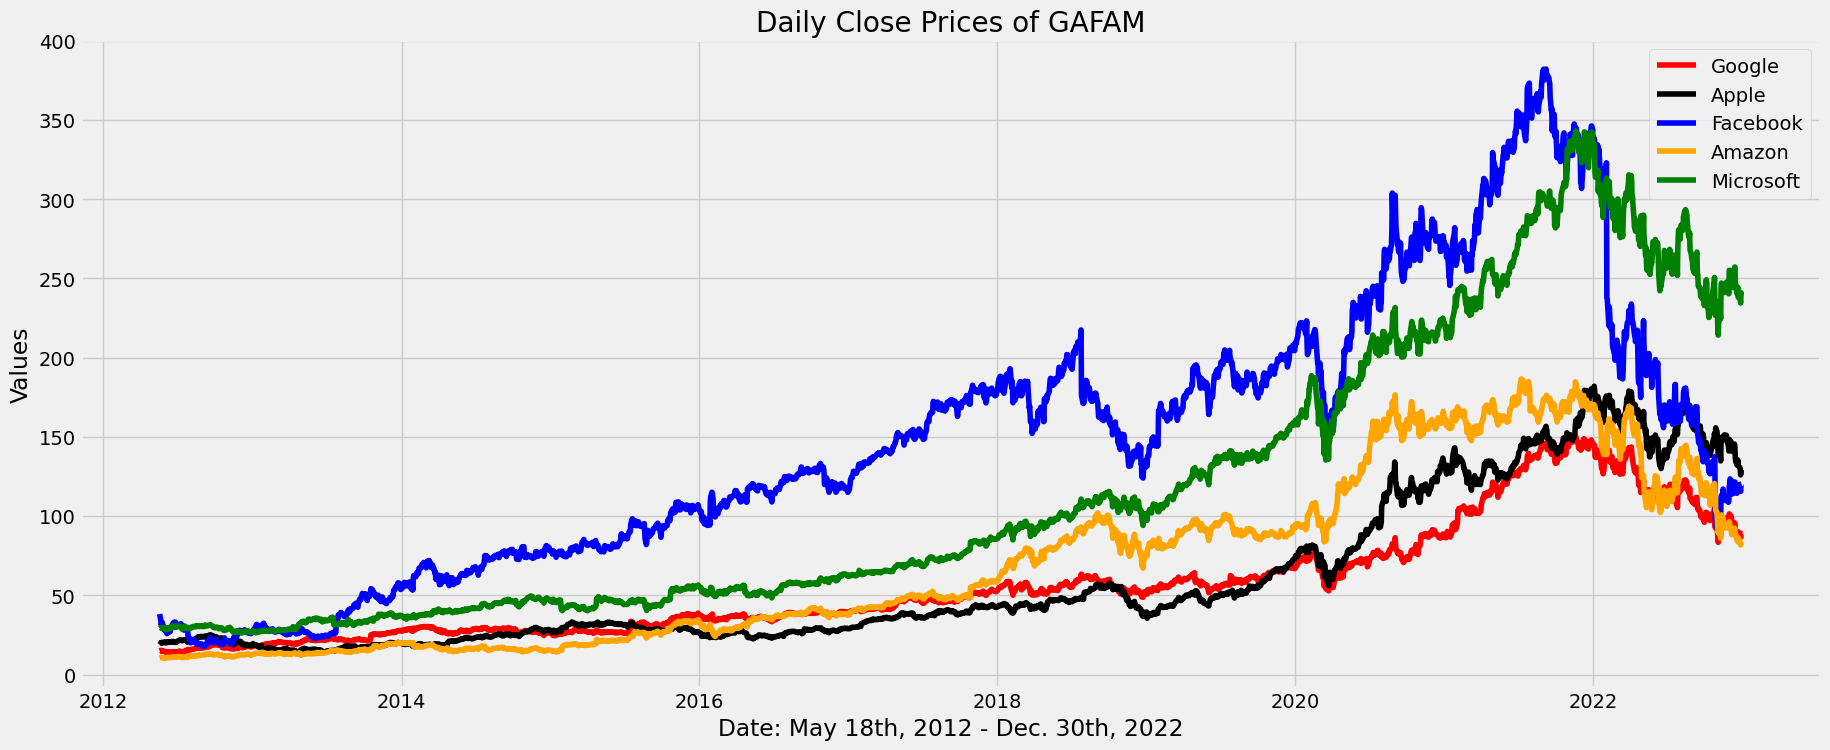

In [8]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

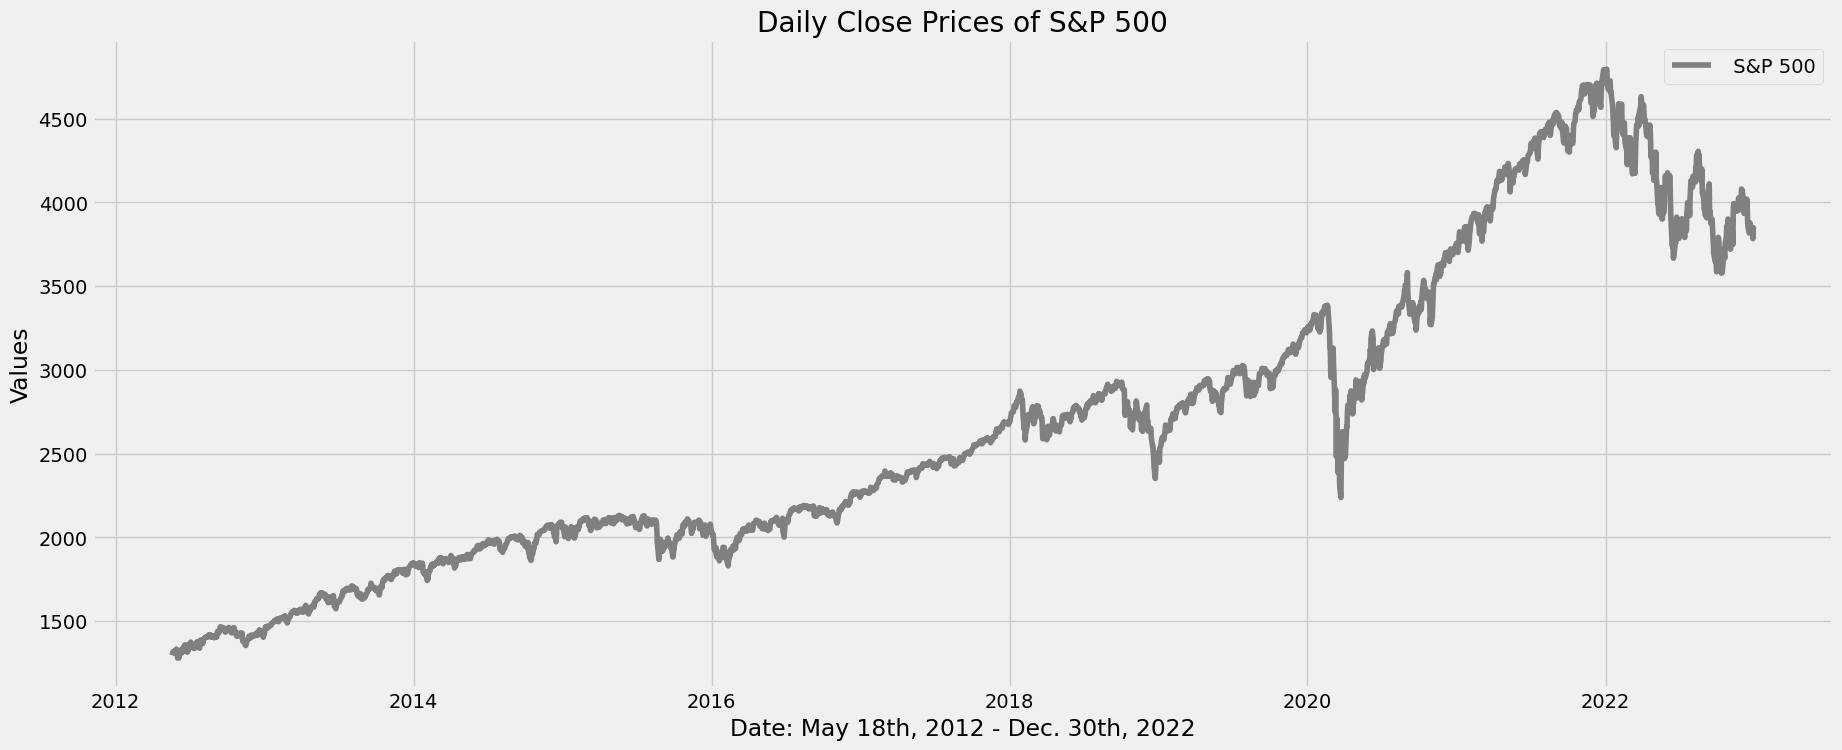

In [9]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

### Standard risk measure: Volatility (Returns)
- 일반적인 위험 측정 지표: 변동성 (수익률의 표준편차)
- 변동성은 투자 자산의 가격이나 수익률이 평균값으로부터 얼마나 떨어져 있는지를 나타내는 통계적 척도입니다. 이는 다음과 같은 특징을 가집니다:
  - 투자 위험의 가장 기본적인 측정 방법
  - 수익률의 표준편차로 계산
  - 일반적으로 연간화된 값으로 표시 (annualized volatility)
    - 주식: √252 × 일간 표준편차
    - 암호화폐: √365 × 일간 표준편차
- 변동성이 높을수록:
  - 투자 위험이 더 크다고 판단
  - 수익률의 변화가 더 크고 예측하기 어려움
  - 잠재적 손실 위험이 증가

Simple Return
$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

[pandas.DataFrame.pct_change](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)
- 한 객체 내에서 행과 행의 차이를 현재값과의 백분율로 출력하는 메서드입니다.
- 즉, `(다음행 - 현재행) / 현재행` 을 의미합니다.

In [10]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head()

,GOOG,AAPL,META,AMZN,MSFT,GSPC,R_GOOG,R_AAPL,R_META,R_AMZN,R_MSFT,R_GSPC
Date,,,,,,,,,,,,
2012-05-18,14.953949,18.942142,38.230000,10.6925,29.270000,1295.219971,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,15.295419,20.045713,34.029999,10.9055,29.750000,1315.989990,0.022835,0.058260,-0.109861,0.019921,0.016399,0.016036
2012-05-22,14.963912,19.891787,31.000000,10.7665,29.760000,1316.630005,-0.021674,-0.007679,-0.089039,-0.012746,0.000336,0.000486
2012-05-23,15.179603,20.377144,32.000000,10.8640,29.110001,1318.859985,0.014414,0.024400,0.032258,0.009056,-0.021841,0.001694
2012-05-24,15.035145,20.190001,33.029999,10.7620,29.070000,1320.680054,-0.009517,-0.009184,0.032187,-0.009389,-0.001374,0.001380


In [11]:
dataset.describe()

,GOOG,AAPL,META,AMZN,MSFT,GSPC,R_GOOG,R_AAPL,R_META,R_AMZN,R_MSFT,R_GSPC
count,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2673.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,56.827974,60.044056,147.991912,70.188333,116.448706,2664.394164,0.000809,0.000889,0.000751,0.000978,0.000930,0.000467
std,35.578551,48.235577,86.999128,53.709630,89.866126,904.069600,0.016898,0.018314,0.025274,0.020336,0.016856,0.010953
min,13.924059,13.947500,17.730000,10.411000,26.370001,1278.040039,-0.111008,-0.128647,-0.263901,-0.140494,-0.147390,-0.119841
25%,28.241163,24.965000,77.830002,18.938499,44.830002,1989.569946,-0.006764,-0.007677,-0.010112,-0.008609,-0.006850,-0.003640
50%,47.955502,38.867500,142.279999,49.758499,74.190002,2473.449951,0.000688,0.000671,0.000870,0.000916,0.000681,0.000594
75%,71.591003,79.722504,191.289993,100.495003,183.429993,3197.520020,0.008903,0.010434,0.012629,0.011109,0.009257,0.005426
max,150.709000,182.009995,382.179993,186.570496,343.109985,4796.560059,0.160524,0.119808,0.296115,0.141311,0.142169,0.093828


In [12]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.016898
R_AAPL    0.018314
R_META    0.025274
R_AMZN    0.020336
R_MSFT    0.016856
R_GSPC    0.010953
dtype: float64

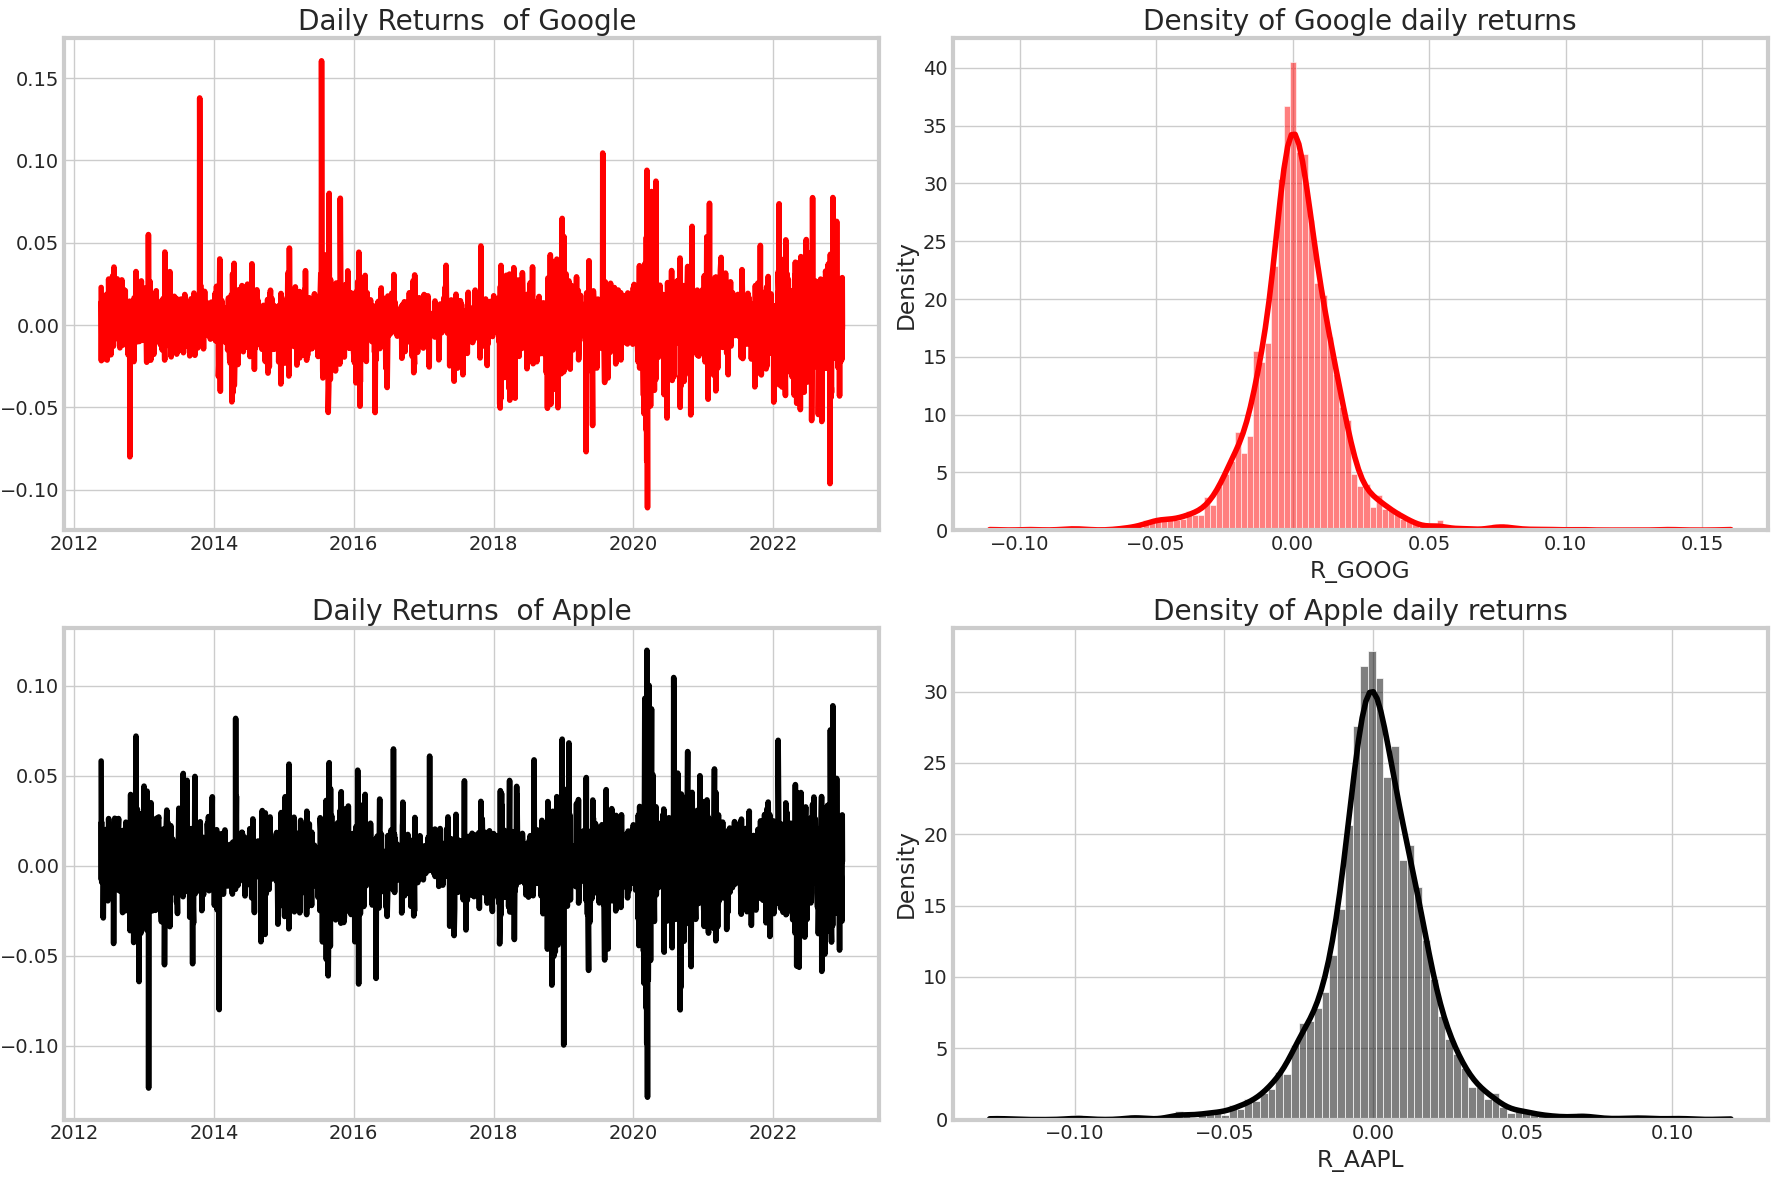

In [13]:
from scipy import stats
with sns.axes_style("whitegrid"):
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

  axes[0][0].plot(dataset['R_GOOG'], color='red')
  axes[0][0].set_title('Daily Returns  of Google ')

  sns.histplot(dataset['R_GOOG'], stat = 'density', kde=True, color='red',
              ax=axes[0][1])
  axes[0][1].set_title('Density of Google daily returns')

  axes[1][0].plot(dataset['R_AAPL'], color='black')
  axes[1][0].set_title('Daily Returns  of Apple')

  sns.histplot(dataset['R_AAPL'], stat = 'density', kde=True, color='black',
              ax=axes[1][1])
  axes[1][1].set_title('Density of Apple daily returns')
  plt.tight_layout()
  fig.show();

## Portfolio Optimization using Efficient Frontier
- 효율적 투자선(효율적 프론티어)을 이용한 포트폴리오 최적화
- 효율적 투자선은 현대 포트폴리오 이론의 핵심 개념으로:
  - 주어진 위험 수준에서 최대 기대수익률을 제공하거나
  - 주어진 기대수익률에서 최소 위험을 제공하는
  - 최적의 포트폴리오 조합을 나타내는 곡선입니다.
- 이는 다음과 같은 과정을 통해 구현됩니다:
  - 여러 자산의 수익률과 위험 계산
  - 자산 간 상관관계 분석
  - 다양한 가중치 조합으로 포트폴리오 생성
  - 리스크 대비 수익률이 최적화된 포트폴리오 도출


### Correlation coefficients between companies' close prices

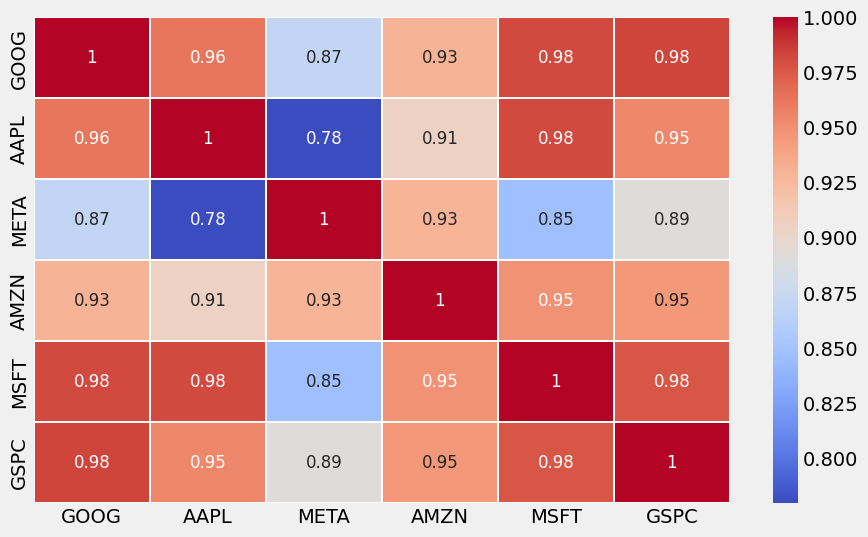

In [14]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values
            , linewidths=0.3, annot=True, annot_kws={'size':12}, cmap='coolwarm')
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=90)
plt. show()

### Correlation coefficients between companies' returns

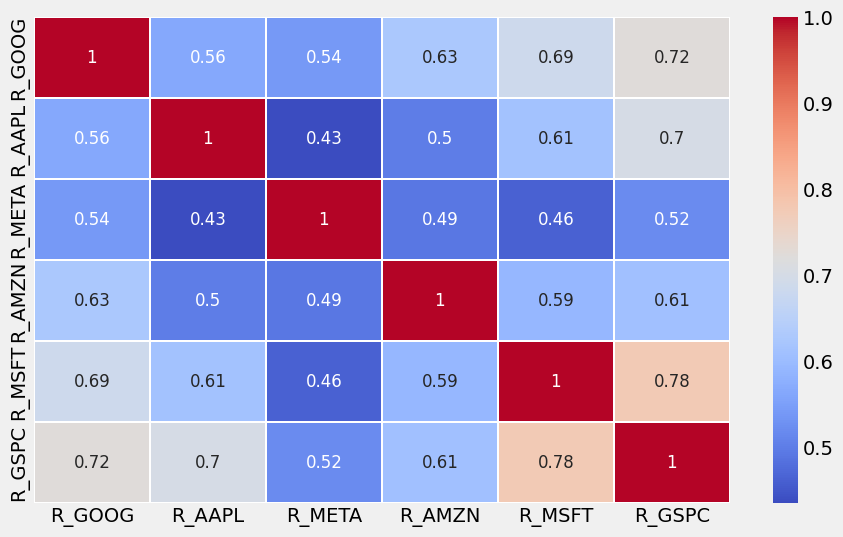

In [15]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values
            , linewidths=0.3, annot=True, annot_kws={'size':12}, cmap='coolwarm')
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=90)
plt. show()

$i$ = {GOOG,AAPL,META,AMZN,MSFT,GSPC}
- Annualized Volatility = $Daily Volatility_i$ x $\sqrt{252}$ = $Returns_i$ x $\sqrt{252}$
- Monthly volatility = $Daily Volatility_i$ x $\sqrt{21}$ = $Returns_i$ x $\sqrt{21}$

In [16]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 26.82 % per year
The volatility of the stock of R_AAPL = 29.07 % per year
The volatility of the stock of R_META = 40.12 % per year
The volatility of the stock of R_AMZN = 32.28 % per year
The volatility of the stock of R_MSFT = 26.76 % per year
The volatility of the stock of R_GSPC = 17.39 % per year


In [17]:
returns  = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 7.74 % per month
The volatility of the stock of R_AAPL = 8.39 % per month
The volatility of the stock of R_META = 11.58 % per month
The volatility of the stock of R_AMZN = 9.32 % per month
The volatility of the stock of R_MSFT = 7.72 % per month
The volatility of the stock of R_GSPC = 5.02 % per month


### Sharpe ratio
It is calculated by the formula below:
$$
Sharpe ratio = { R_p - R_f \over \sigma_p }
$$
 
- $R_p$ = Return of portfolio.
- $R_f$ = Risk-Free rate.
- $\sigma_p$ = Standard deviation of portfolio's excess return.

In [18]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [19]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.67
The Sharpe ratio of, R_AAPL = 0.68
The Sharpe ratio of, R_META = 0.41
The Sharpe ratio of, R_AMZN = 0.69
The Sharpe ratio of, R_MSFT = 0.78
The Sharpe ratio of, R_GSPC = 0.53


### Beta of a Security
- 증권(주식)의 베타 계수
- 베타(β)는 시장 위험을 나타내는 핵심 지표로:
  - 개별 주식의 시장 민감도를 측정
  - 시장 대비 변동성을 나타내는 지표
  - 체계적 위험(systematic risk)의 척도
- 베타 값의 의미:
  - `β > 1`: 시장보다 변동성이 큼 (공격적)
  - `β = 1`: 시장과 동일한 변동성
- `β < 1`: 시장보다 변동성이 작음 (방어적)
  - `β = 0`: 시장과 무관한 움직임
  - `β < 0`: 시장과 반대 방향으로 움직임
베타는 다음 공식으로 계산됩니다:
$$
\beta = { Cov(Stock, S\&P) \over Var(S\&P) }
$$

In [20]:
cov = returns.cov() * 12 # annualized
cov

,R_GOOG,R_AAPL,R_META,R_AMZN,R_MSFT,R_GSPC
R_GOOG,0.003426,0.002098,0.002770,0.002577,0.002345,0.001607
R_AAPL,0.002098,0.004025,0.002415,0.002237,0.002270,0.001689
R_META,0.002770,0.002415,0.007665,0.003033,0.002361,0.001728
R_AMZN,0.002577,0.002237,0.003033,0.004962,0.002432,0.001623
R_MSFT,0.002345,0.002270,0.002361,0.002432,0.003410,0.001719
R_GSPC,0.001607,0.001689,0.001728,0.001623,0.001719,0.001440


In [21]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of Google is : 1.1160956781111853
Beta (10Y period) of Apple is : 1.1730606352218889
Beta (10Y period) of Facebook is : 1.200017516496074
Beta (10Y period) of Amazon is : 1.127099926299393
Beta (10Y period) of Microsoft is : 1.1941011901897405
Beta (10Y period) of S&P 500 is : 1.0


### Portfolio Simulation
- 포트폴리오 시뮬레이션은 다음과 같은 투자 분석 과정을 의미합니다:
  - 다양한 포트폴리오 구성을 가상으로 생성
  - 각 포트폴리오의 성과를 시뮬레이션
  - 위험-수익 특성 분석
  - 최적의 자산 배분 도출
- 주요 단계:
  - 여러 자산 조합으로 포트폴리오 생성
  - 몬테카를로 시뮬레이션 등을 통한 수익률 예측
  - 다양한 시나리오에서의 포트폴리오 성과 분석
  - 위험 조정 수익률 계산
  - 최적 포트폴리오 선정
- 이를 통해 투자자는:
  - 다양한 투자 전략 테스트 가능
  - 리스크 관리 개선
  - 더 나은 투자 의사결정 가능

In [22]:
from scipy.optimize import minimize

In [23]:
# Portfolio Simulation
portfolio        = 2673  # generation of a portfolio
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risk free rate

for i in range(portfolio):
  w                   = weights[i,:]
  expected_returns[i] = np.sum(mean_returns @ w)*252
  expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
  sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [24]:
def portfolio_volatility(weight):
  return np.sqrt(np.dot(weight.T,
                        np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
  return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
  return_p = portfolio_return(weight)
  vol_p    = portfolio_volatility(weight)
  return return_p, vol_p

In [25]:
def negativeSR(weight):
  return_p, vol_p = portfolio_performance(weight)
  rf_rate         = 0.025
  return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():
  def sum_one(weight):
    w= weight
    return np.sum(weight)-1

  n_assets           = returns.shape[1]
  weight_constraints = ({'type':'eq','fun': sum_one})
  w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initila guess

  return minimize(negativeSR, w0, method='SLSQP',
                        bounds  =((0,1),)*n_assets,
                    constraints = weight_constraints)

In [26]:
def min_vol():
  n_assets           = returns.shape[1]
  weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
  w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
  bounds             = ((0,1),)*n_assets

  return minimize(portfolio_volatility, w0, method='SLSQP',
                  bounds      = bounds,
                  constraints = weight_constraints)

In [27]:
def efficient_portfolio_target(target):
  constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                {'type' :'eq','fun': lambda x: np.sum(x)-1})
  w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
  bounds      = ((0,1),)*n_assets

  return minimize(portfolio_volatility, w0, method = 'SLSQP',
                  bounds      = bounds,
                  constraints = constraints)

In [28]:
def efficient_frontier(return_range):
  return [efficient_portfolio_target(ret) for ret in return_range]

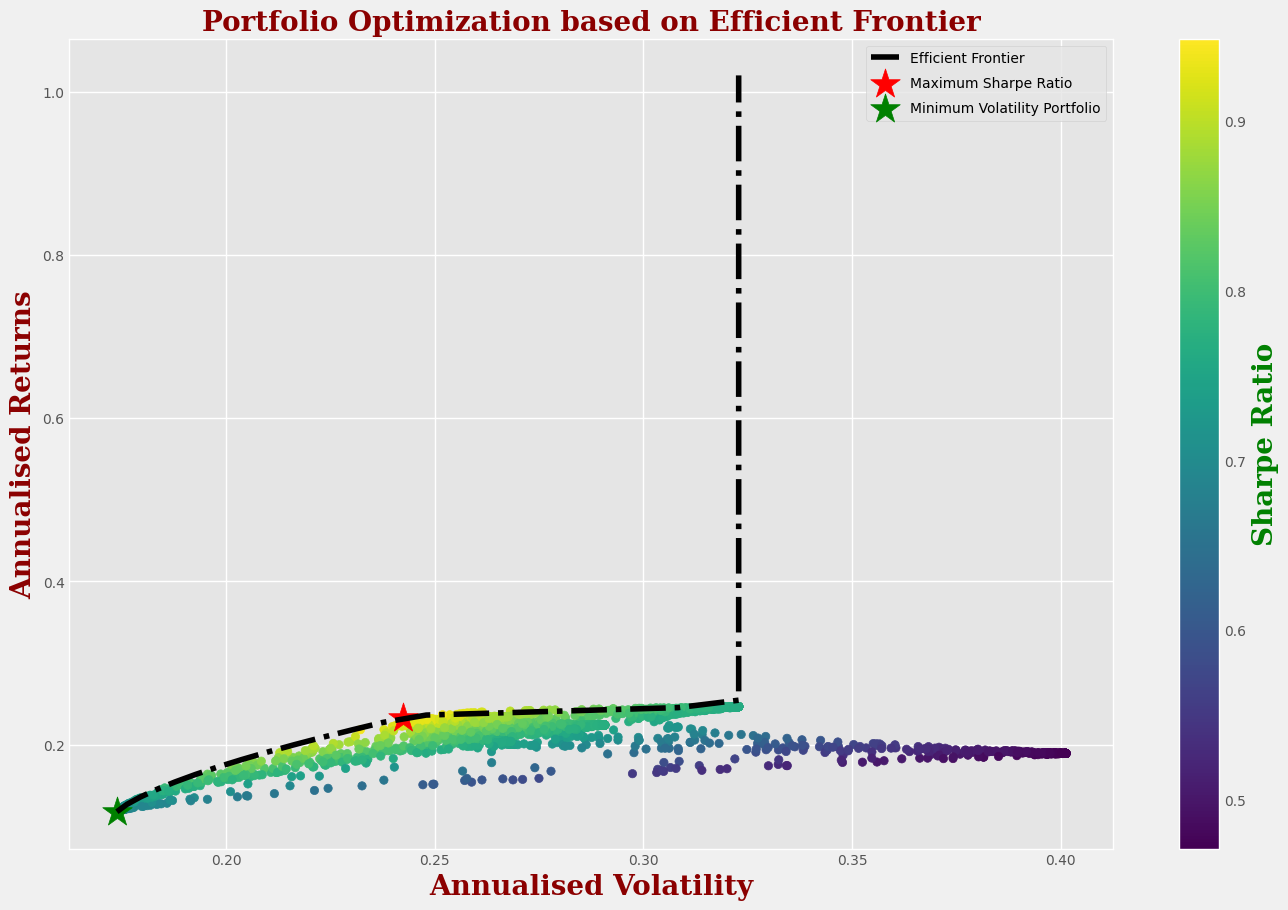

In [29]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
        label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

### Random portfolio simulation

In [30]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)
    
tickers

['GOOG', 'AAPL', 'META', 'AMZN', 'MSFT', 'GSPC']

In [31]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
  portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
  portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
  sharpe_ratio = (portfolio_return - rf) / portfolio_std
  return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
  results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
  for i in range(num_portfolios):
    weights=np.random.random(len(mean_returns))
    weights /= np.sum(weights)
    portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
    results_matrix[0,i] = portfolio_return
    results_matrix[1,i] = portfolio_std
    results_matrix[2,i] = sharpe_ratio
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
      results_matrix[j+3,i] = weights[j]
  results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
  return results_df

In [32]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
# random selection/creation of the portfolio
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) 

In [33]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

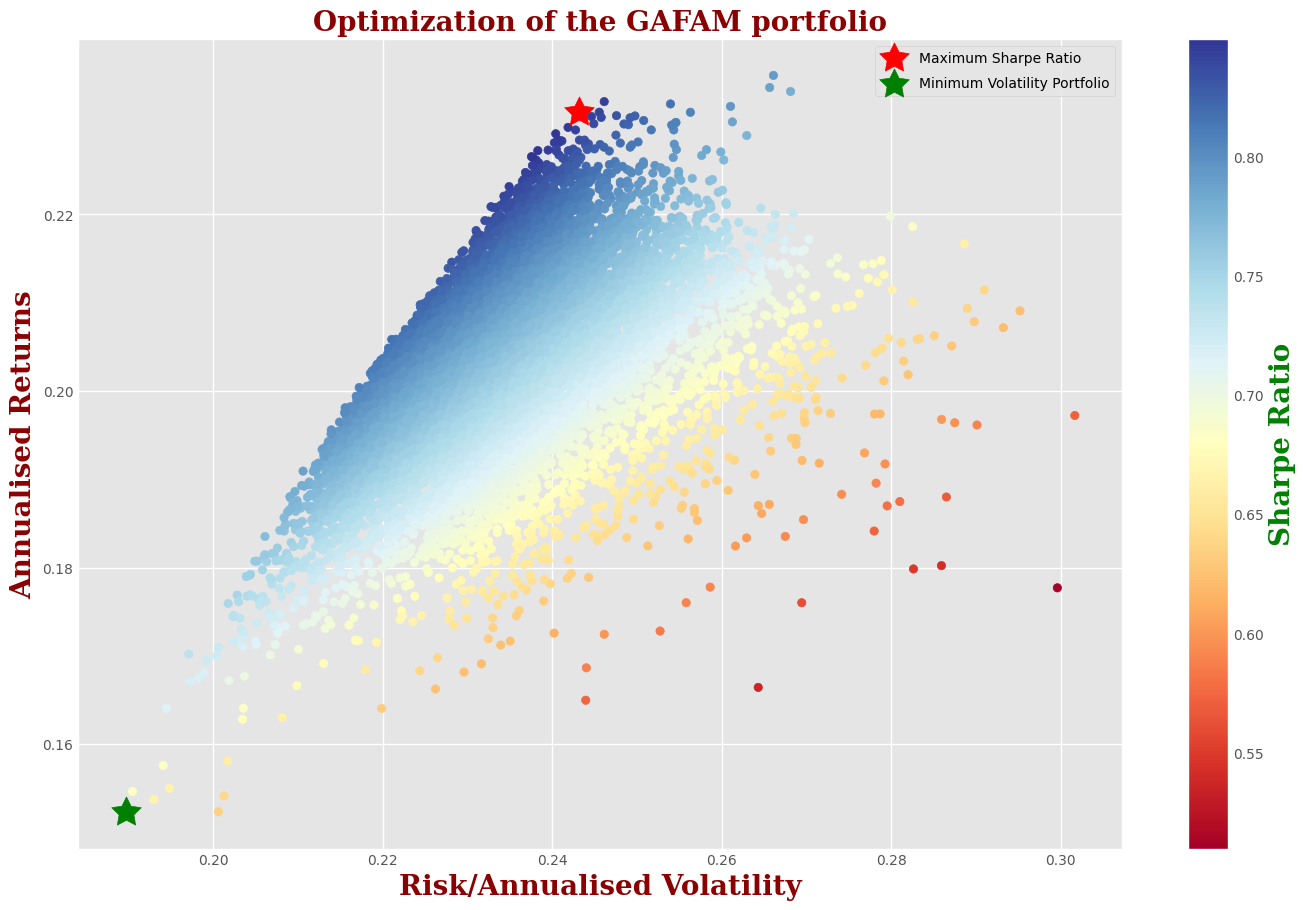

In [34]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

In [35]:
# portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower than
max_sharpe_port.to_frame().T 

,ret,stdev,sharpe,GOOG,AAPL,META,AMZN,MSFT,GSPC
3270,0.231556,0.24312,0.849603,0.011955,0.269486,0.034679,0.209609,0.469536,0.004734


In [36]:
# portfolio with the Lowest variance portfolio
min_vol_port.to_frame().T 

,ret,stdev,sharpe,GOOG,AAPL,META,AMZN,MSFT,GSPC
2695,0.152335,0.189673,0.67134,0.129409,0.07794,0.052775,0.016958,0.079501,0.643417
